In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL\Total_Carlos_++.csv")

In [12]:
data

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Big chances created,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Saves,Clean sheets,Penalties faced,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Yellow cards,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
0,Ryan Manning,0.12,0.05,58.14,1.35,0.00,0.0,1.95,1.26,0.0,1.00,0.02,0.51,0.33,0.23,52.77,81.84,12.63,38.79,0.0,0.21,0.0,0.0,1.09,0.16,0.26,0.00,58.33,64.17,2.21,0.95,43,2,2,Championship,2
1,Oliver Norwood,0.04,0.02,57.14,1.09,0.00,0.2,2.41,1.67,0.0,1.72,0.00,0.91,0.20,0.11,53.76,78.33,13.07,48.65,0.0,0.33,0.0,0.0,0.72,0.09,0.15,0.00,50.00,59.43,0.61,0.61,46,3,3,Championship,2
2,Ross Stewart,0.77,0.46,41.18,3.54,0.15,0.0,1.00,0.15,0.0,1.77,0.00,0.69,0.08,0.23,25.85,68.75,6.38,65.00,0.0,0.23,0.0,0.0,0.92,0.15,0.00,0.00,48.94,48.82,1.31,1.00,13,2,4,Championship,2
3,Sam Tickle,0.00,0.00,100.00,0.00,0.00,0.0,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.00,30.00,70.00,2.00,35.71,2.0,1.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,1,1,1,Championship,2
4,Gustavo Hamer,0.22,0.15,56.79,2.56,0.00,0.0,2.63,1.05,0.0,0.71,0.02,1.73,0.39,0.24,45.20,72.58,12.00,49.84,0.0,0.24,0.0,0.0,0.98,0.02,0.15,0.05,32.00,47.57,0.83,1.68,41,2,3,Championship,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,Harvey White,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,5.00,40.00,1.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,100.00,50.00,0.00,0.00,1,1,3,Premier League,1
7966,Conor Coventry,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1,3,Premier League,1
7967,Connor Ronan,0.00,0.00,100.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.00,100.00,3.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,1,2,3,Premier League,1
7968,David Ozoh,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.00,100.00,3.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1,3,Premier League,1


In [4]:
# Reemplaza los valores infinitos con NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Luego reemplaza los valores NaN con 0
data = data.fillna(0)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

Name                              0
Goals                             0
Big chances missed                0
Successful dribbles %             0
Total shots                       0
Headed goals                      0
Set piece conversion %            0
Tackles                           0
Interceptions                     0
Penalty committed                 0
Clearances                        0
Errors lead to goal               0
Dribbled past                     0
Big chances created               0
Assists                           0
Total passes                      0
Accurate passes %                 0
Accurate final third passes       0
Accurate long balls %             0
Saves                             0
Clean sheets                      0
Penalties faced                   0
Penalties saved                   0
Goals conceded inside the box     0
Goals conceded outside the box    0
Yellow cards                      0
Red cards                         0
Aerial duels won %          

C:\Users\Carlo\AppData\Local\Temp\ipykernel_38960\2411817549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

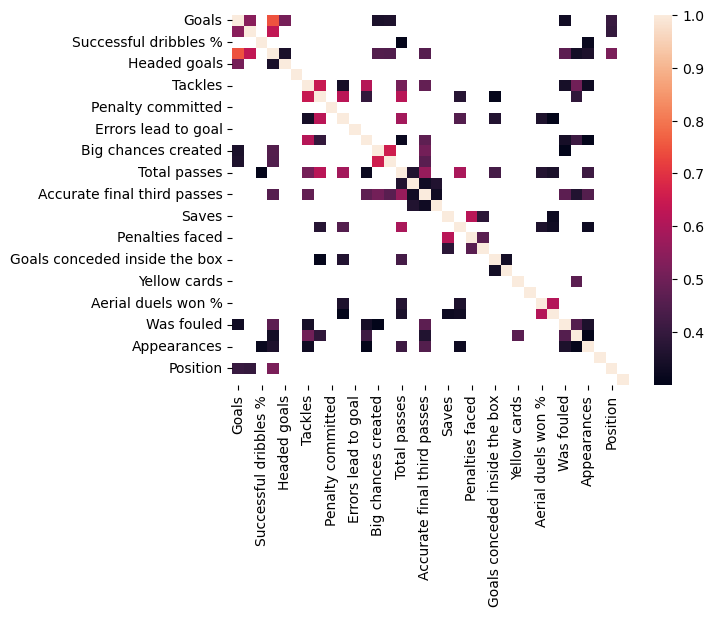

In [7]:
corr = data.corr()
correlation = corr[corr > 0.30]
sns.heatmap(correlation)

# Primera visualización 


La unica posicion que tiene una correlación superior al 30% en relacion a las habilidades es la de delantero o eso se presume, ya que no tiene ningun tipo de relación superior a el resto de habilidades expeto, las de un goleador.

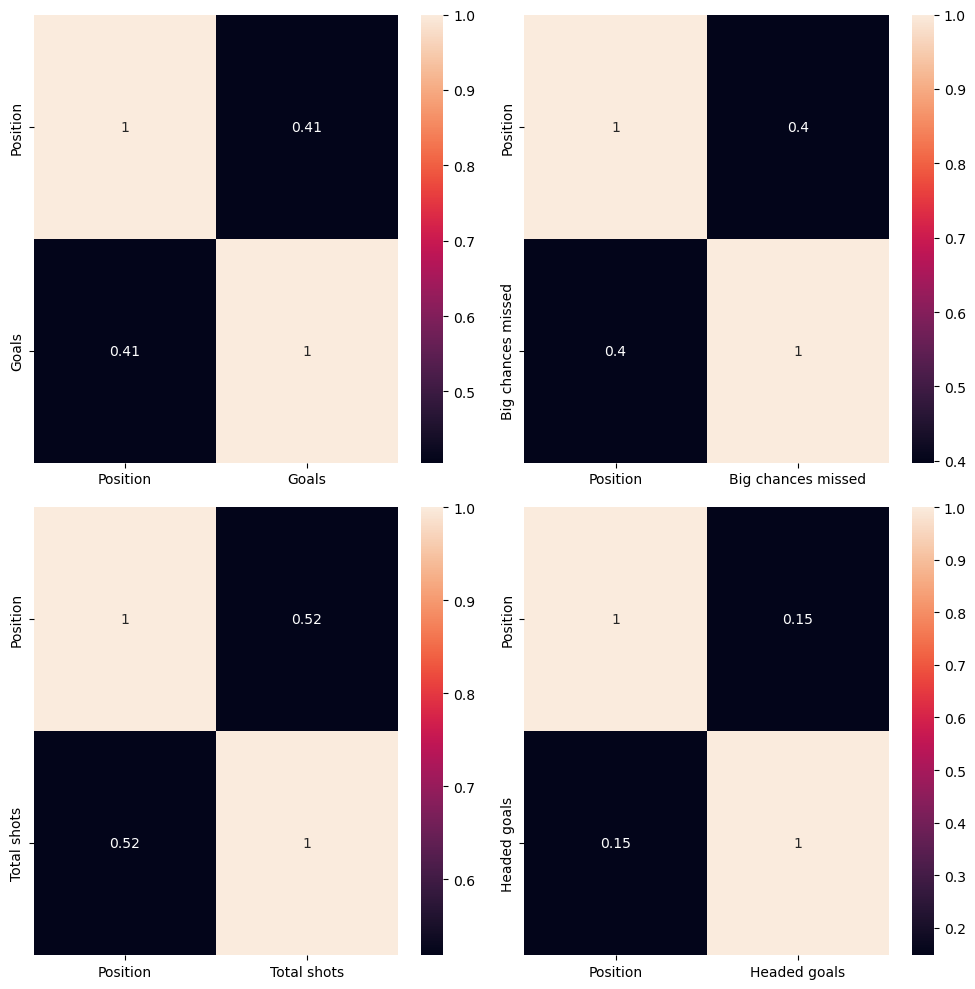

In [8]:
fig, axis = plt.subplots(2,2,figsize = (10, 10))
sns.heatmap(data[["Position", "Goals"]].corr(), annot = True, ax=axis[0, 0])
sns.heatmap(data[["Position", "Big chances missed"]].corr(), annot = True, ax = axis[0,1])
sns.heatmap(data[["Position", "Headed goals"]].corr(), annot = True, ax = axis[1,1])
sns.heatmap(data[["Position", "Total shots"]].corr(), annot = True, ax = axis[1,0])
plt.tight_layout()
plt.show()


In [9]:
data.isna().sum()

Name                              0
Goals                             0
Big chances missed                0
Successful dribbles %             0
Total shots                       0
Headed goals                      0
Set piece conversion %            0
Tackles                           0
Interceptions                     0
Penalty committed                 0
Clearances                        0
Errors lead to goal               0
Dribbled past                     0
Big chances created               0
Assists                           0
Total passes                      0
Accurate passes %                 0
Accurate final third passes       0
Accurate long balls %             0
Saves                             0
Clean sheets                      0
Penalties faced                   0
Penalties saved                   0
Goals conceded inside the box     0
Goals conceded outside the box    0
Yellow cards                      0
Red cards                         0
Aerial duels won %          

# Aplicaremos PCA observar si se pueden reducir la dimensionalidad de los datos

In [20]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

Columna_habilidades = data.columns.drop(["Name", "League"])

features = data[Columna_habilidades]

features['Level'] = features['Level'] * 50
features['Appearances'] = features['Appearances'] * 30


# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)

# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6)  # Buscamos 6 vecinos porque uno de ellos será el jugador mismo

# Ajusta el modelo a tus datos
model.fit(features_scaled)

# Define una función para buscar jugadores similares
def buscar_jugadores_similares(nombre):
    jugador = data[data['Name'] == nombre]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        # Asegúrate de escalar las características del jugador antes de pasarlas a kneighbors
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        return data.iloc[indices[0]][1:]  # Excluimos el primer resultado porque será el jugador mismo


C:\Users\Carlo\AppData\Local\Temp\ipykernel_38960\2161826149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Level'] = features['Level'] * 50
C:\Users\Carlo\AppData\Local\Temp\ipykernel_38960\2161826149.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Appearances'] = features['Appearances'] * 30


In [19]:
# Ahora puedes buscar jugadores similares
pd.set_option('display.max_columns', None)
buscar_jugadores_similares('Anel Ahmedhodžić')

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Big chances created,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Saves,Clean sheets,Penalties faced,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Yellow cards,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
5564,Andrea Carboni,0.19,0.06,72.73,0.75,0.13,0.0,2.56,1.31,0.0,3.31,0.0,0.69,0.06,0.06,48.69,77.02,6.94,36.59,0.0,0.19,0.0,0.0,0.94,0.13,0.25,0.0,54.35,60.00,0.63,1.00,16,1,2,Serie B,2
5003,Stefan Posch,0.20,0.07,46.67,0.93,0.10,0.0,2.70,1.17,0.0,2.00,0.0,1.03,0.10,0.07,49.17,76.75,7.20,46.03,0.0,0.20,0.0,0.0,1.03,0.10,0.20,0.0,49.09,53.19,0.93,1.57,30,2,2,Serie A,1
202,Yuta Nakayama,0.14,0.21,33.33,1.00,0.07,0.0,1.14,0.93,0.0,2.50,0.0,0.50,0.07,0.00,40.57,79.40,4.14,45.07,0.0,0.29,0.0,0.0,0.93,0.07,0.14,0.0,65.52,54.39,0.43,1.00,14,2,2,Championship,2
79,Jonathan Panzo,0.03,0.03,50.00,0.52,0.03,0.0,1.55,1.72,0.0,2.90,0.0,0.34,0.00,0.03,37.76,83.20,4.79,50.00,0.0,0.45,0.0,0.0,0.69,0.03,0.24,0.0,59.18,57.89,0.45,0.93,29,1,2,Championship,2
1726,Nahuel Tenaglia,0.09,0.12,43.24,1.00,0.06,0.0,1.82,1.26,0.0,2.06,0.0,0.65,0.03,0.03,24.09,62.39,4.47,22.37,0.0,0.32,0.0,0.0,0.62,0.09,0.24,0.0,59.49,55.96,0.88,1.21,34,2,2,La Liga 2,2


Sí, definitivamente puedes darle más importancia a ciertas características en tu modelo. Esto se conoce como ponderación de características y puede ser especialmente útil si consideras que algunas características son más importantes que otras para determinar la similitud entre los jugadores.

Una forma de hacerlo es multiplicar los valores de las características más importantes por un factor antes de entrenar tu modelo. Aquí te muestro cómo podrías hacerlo:

# Supongamos que 'habilidad1' es una característica importante
data['habilidad1'] = data['habilidad1'] * 1.5

# Ahora 'habilidad1' tiene más peso en tu modelo

Este código multiplica todos los valores en la columna ‘habilidad1’ por 1.5, lo que efectivamente le da más peso a esa característica en tu modelo.

Otra opción sería utilizar un algoritmo que soporte la ponderación de características directamente. Por ejemplo, muchos algoritmos de clasificación en scikit-learn permiten pasar un parámetro class_weight que puedes usar para especificar la importancia de cada característica.

Ten en cuenta que la ponderación de características puede tener un impacto significativo en los resultados de tu modelo, por lo que deberías hacerlo con cuidado y asegurarte de validar tu modelo después de cambiar los pesos. ¡Espero que esto te ayude! 😊




-----------------------------------



Entiendo, quieres dar más peso a 6 características específicas sin eliminar las demás. Una forma de hacerlo es escalar estas 6 características por un factor mayor que 1 antes de pasar los datos al algoritmo k-NN. Esto hará que estas características tengan más peso en el cálculo de la distancia. Aquí te dejo un ejemplo de cómo podrías hacerlo:

Python

# Supongamos que 'important_features' es una lista de las 6 características más importantes
important_features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']

# Escala las características importantes
for feature in important_features:
    data[feature] *= importance_factor  # 'importance_factor' es el factor por el que quieres escalar las características importantes

# Luego, puedes seguir con tu código para escalar todas las características y ajustar el modelo k-NN
Código generado por IA. Revisar y usar cuidadosamente. Más información sobre preguntas frecuentes.
Este código multiplicará los valores de tus 6 características importantes por importance_factor, lo que efectivamente les dará más peso en el cálculo de la distancia en el algoritmo k-NN.

Espero que esto te ayude. Si tienes más preguntas, no dudes en hacerlas. ¡Buena suerte con tu proyecto! 🍀